# Temperature forecast

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
import pandas as pd

# Replace with the correct raw URL from GitHub
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv"

# Read the CSV file
df = pd.read_csv(url)


In [6]:
# Displaying first few rows of the dataset
df.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [7]:
# Checking for missing values
df.isnull().sum()

# Dropping unnecessary columns like 'station', 'Date' for this analysis
df.drop(['station', 'Date'], axis=1, inplace=True)

# Handling missing values by filling with mean values
df.fillna(df.mean(), inplace=True)

# Checking data types
df.info()

# Statistical summary of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7752 non-null   float64
 1   Present_Tmin      7752 non-null   float64
 2   LDAPS_RHmin       7752 non-null   float64
 3   LDAPS_RHmax       7752 non-null   float64
 4   LDAPS_Tmax_lapse  7752 non-null   float64
 5   LDAPS_Tmin_lapse  7752 non-null   float64
 6   LDAPS_WS          7752 non-null   float64
 7   LDAPS_LH          7752 non-null   float64
 8   LDAPS_CC1         7752 non-null   float64
 9   LDAPS_CC2         7752 non-null   float64
 10  LDAPS_CC3         7752 non-null   float64
 11  LDAPS_CC4         7752 non-null   float64
 12  LDAPS_PPT1        7752 non-null   float64
 13  LDAPS_PPT2        7752 non-null   float64
 14  LDAPS_PPT3        7752 non-null   float64
 15  LDAPS_PPT4        7752 non-null   float64
 16  lat               7752 non-null   float64


,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


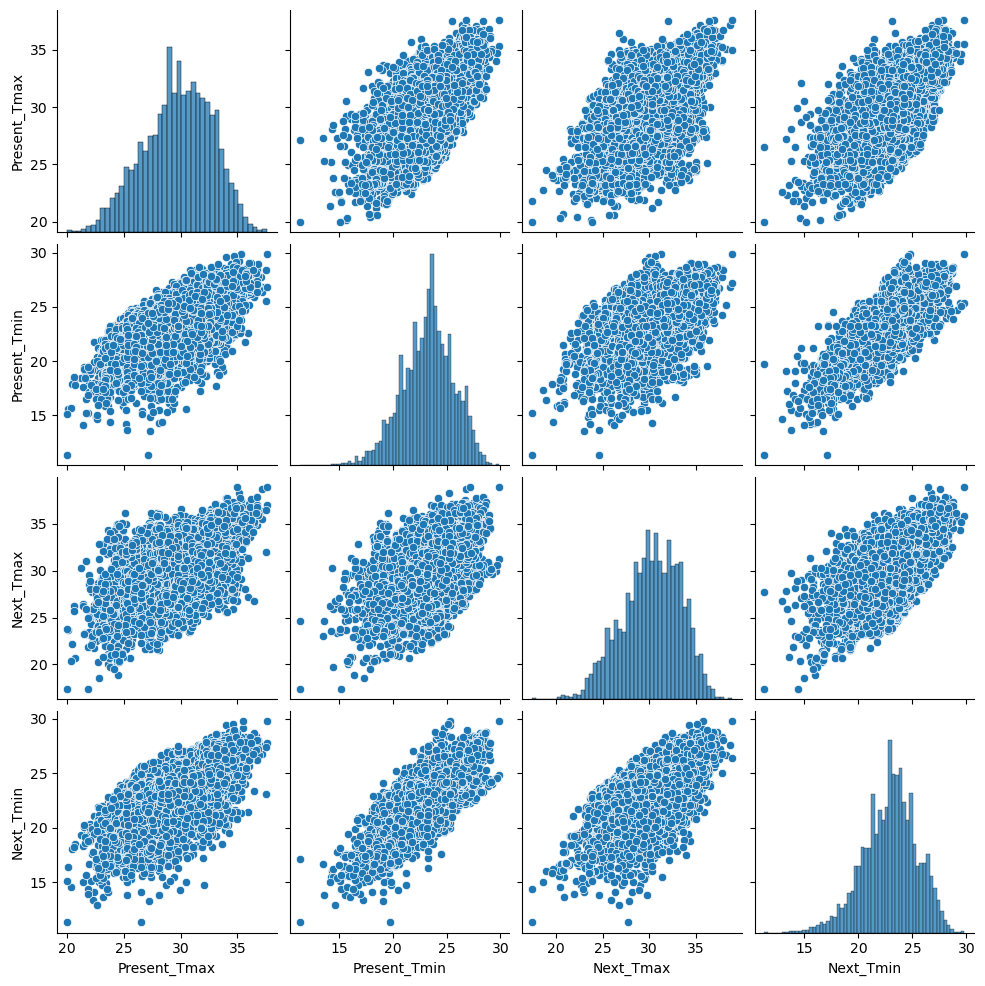

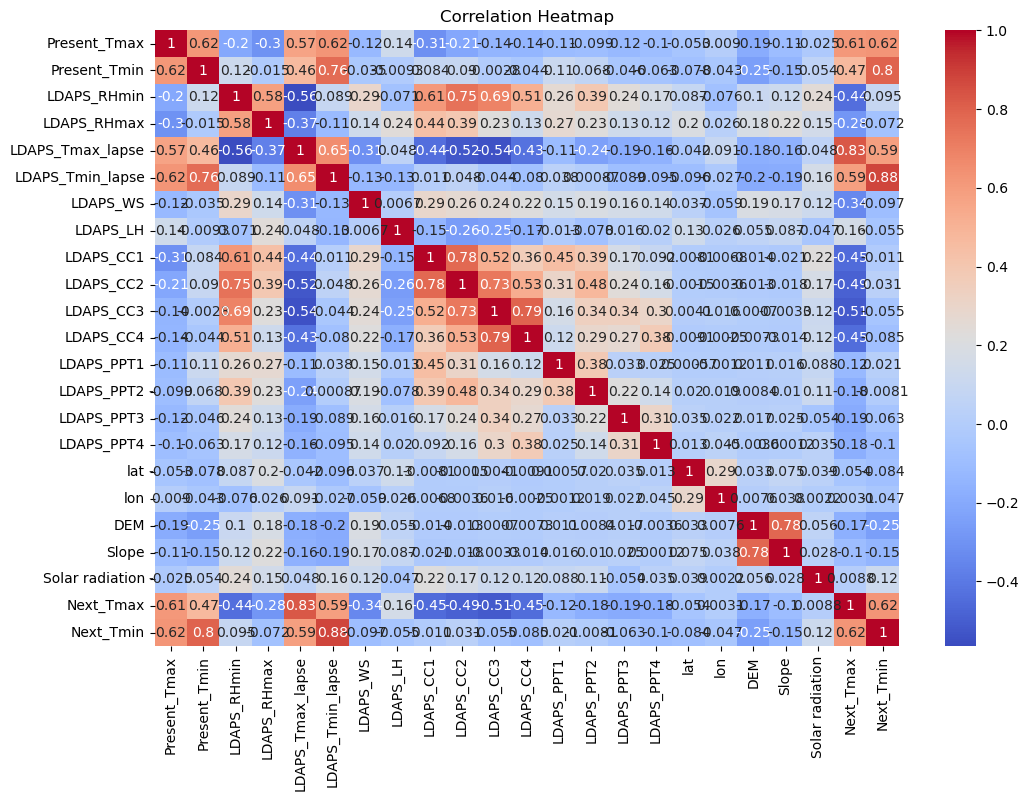

In [8]:
# Pairplot to visualize relationships between variables
sns.pairplot(df[['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Splitting data into features (X) and target (y) variables
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_min = df['Next_Tmin']

# Train-test split
X_train, X_test, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)

# Standard scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training - Random Forest Regressor
rf_min = RandomForestRegressor(random_state=42)
rf_min.fit(X_train_scaled, y_train_min)

# Model evaluation
y_pred_min = rf_min.predict(X_test_scaled)
mse_min = mean_squared_error(y_test_min, y_pred_min)
r2_min = r2_score(y_test_min, y_pred_min)
print(f"Mean Squared Error (MSE) for Minimum Temperature: {mse_min}")
print(f"R-squared (R2) Score for Minimum Temperature: {r2_min}")


Mean Squared Error (MSE) for Minimum Temperature: 0.5765175303140037
R-squared (R2) Score for Minimum Temperature: 0.9074854197930023


In [17]:
# Splitting data into features (X) and target (y) variables
y_max = df['Next_Tmax']

# Train-test split
X_train, X_test, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)

# Standard scaling of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training - Random Forest Regressor
rf_max = RandomForestRegressor(random_state=42)
rf_max.fit(X_train_scaled, y_train_max)

# Model evaluation
y_pred_max = rf_max.predict(X_test_scaled)
mse_max = mean_squared_error(y_test_max, y_pred_max)
r2_max = r2_score(y_test_max, y_pred_max)
print(f"Mean Squared Error (MSE) for Maximum Temperature: {mse_max}")
print(f"R-squared (R2) Score for Maximum Temperature: {r2_max}")


Mean Squared Error (MSE) for Maximum Temperature: 0.904481136098725
R-squared (R2) Score for Maximum Temperature: 0.907392960523742
